In [1]:
se_f = "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/SE.rds"
outdir = "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large"
n_donors = 4
top_clones = 4
genome = "/data2/mito_lineage/data/external/GRCh38_MT_blacklist/fasta/genome.fa"


In [2]:
library(Seurat)
library(Signac)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)

Attaching SeuratObject


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Import seurat object

In [3]:
se = readRDS(se_f)

In [4]:
se

An object of class Seurat 
169545 features across 18492 samples within 2 assays 
Active assay: RNA (20010 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [5]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,ID.x,lineage,donor,condition,ID.y
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<int>,<chr>,<I<chr>>,<chr>,<fct>,<fct>,<fct>,<chr>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,5,1673,1406,Control_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1,AAACGAAAGAGGTCCA-1_Control,9,3,Control,Control_AAACGAAAGAGGTCCA-1
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,0,4315,3063,Control_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1,AAACGAAAGCGATACG-1_Control,0,1,Control,Control_AAACGAAAGCGATACG-1
Control_AAACGAAAGTCGTGAG-1,Control,994,994,10177,2450,48,60,657,2135,4827,⋯,5,1731,1414,Control_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1,AAACGAAAGTCGTGAG-1_Control,8,0,Control,Control_AAACGAAAGTCGTGAG-1
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,0,3113,2340,Control_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1,AAACGAACAATAGTGA-1_Control,11,3,Control,Control_AAACGAACAATAGTGA-1
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,5,1559,1394,Control_AAACGAACACAATAAG-1,Control_AAACGAACACAATAAG-1,AAACGAACACAATAAG-1_Control,22,0,Control,Control_AAACGAACACAATAAG-1
Control_AAACGAACACTGATAC-1,Control,954,954,9449,1971,59,21,489,3785,3124,⋯,2,1370,1207,Control_AAACGAACACTGATAC-1,Control_AAACGAACACTGATAC-1,AAACGAACACTGATAC-1_Control,11,2,Control,Control_AAACGAACACTGATAC-1
Control_AAACGAACAGTAACCT-1,Control,693,693,6196,1097,19,17,288,2635,2140,⋯,8,1018,939,Control_AAACGAACAGTAACCT-1,Control_AAACGAACAGTAACCT-1,AAACGAACAGTAACCT-1_Control,34,2,Control,Control_AAACGAACAGTAACCT-1
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,12,8645,5001,Control_AAACGAACATCGTGAT-1,Control_AAACGAACATCGTGAT-1,AAACGAACATCGTGAT-1_Control,2,3,Control,Control_AAACGAACATCGTGAT-1
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,7,1005,905,Control_AAACGAAGTAACGGTG-1,Control_AAACGAAGTAACGGTG-1,AAACGAAGTAACGGTG-1_Control,36,3,Control,Control_AAACGAAGTAACGGTG-1


In [6]:

## Create the counts data.frame and normalize by the condition+donor total
counts <- se[[]] %>%
          group_by(condition, donor, lineage) %>%
          summarize(size=n())

counts.norm.sizes <- counts %>% group_by(condition, donor) %>% mutate(total=sum(size)) %>% ungroup() %>% 
                                mutate(norm=size/total) %>% arrange(desc(norm))

#counts.norm.sizes = counts.norm[order(counts.norm.sizes[,"norm"], decreasing=T),]
counts.norm.sizes

`summarise()` has grouped output by 'condition', 'donor'. You can override using the `.groups` argument.



condition,donor,lineage,size,total,norm
<fct>,<fct>,<fct>,<int>,<int>,<dbl>
None,None,None,3715,3715,1.00000000
Control,3,36,303,1329,0.22799097
Flt3l,3,1,436,2399,0.18174239
Flt3l,3,0,427,2399,0.17799083
Flt3l,2,0,282,1660,0.16987952
Control,0,52,208,1603,0.12975671
Flt3l,0,0,325,2577,0.12611564
Control,3,0,165,1329,0.12415350
Control,3,2,154,1329,0.11587660


In [7]:

## Create the counts data.frame and normalize by the condition+donor total
counts <- se[[]] %>%
          group_by(condition, donor, lineage) %>%
          summarize(size=n())

counts.norm <- counts %>% group_by(condition, donor) %>% mutate(total=sum(size)) %>% ungroup() %>% 
                                mutate(norm=size/total) 

counts.norm.sizes = counts.norm[order(counts.norm.sizes[,"norm"], decreasing=T),]
counts.norm.sizes

`summarise()` has grouped output by 'condition', 'donor'. You can override using the `.groups` argument.

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


condition,donor,lineage,size,total,norm
<fct>,<fct>,<fct>,<int>,<int>,<dbl>
Control,0,0,90,1603,0.056144729
Control,0,1,60,1603,0.037429819
Control,0,2,120,1603,0.074859638
Control,0,3,101,1603,0.063006862
Control,0,4,119,1603,0.074235808
Control,0,5,41,1603,0.025577043
Control,0,6,113,1603,0.070492826
Control,0,7,71,1603,0.044291953
Control,0,8,40,1603,0.024953213


In [8]:
clone.sizes <- counts.norm.sizes %>% 
               group_by(donor,lineage) %>% 
               summarize(norm.total=sum(norm), total=sum(size)) %>% 
               arrange(desc(norm.total)) %>% 
               mutate(name=factor(paste0(donor,"_", lineage)))


clone.sizes

`summarise()` has grouped output by 'donor'. You can override using the `.groups` argument.



donor,lineage,norm.total,total,name
<fct>,<fct>,<dbl>,<int>,<fct>
None,None,1.00000000,3715,None_None
3,0,0.30214433,592,3_0
3,36,0.28801598,447,3_36
3,1,0.24871004,525,3_1
2,0,0.23917201,377,2_0
3,2,0.19674363,348,3_2
0,0,0.18226037,415,0_0
2,1,0.18083582,277,2_1
2,2,0.16133418,248,2_2


In [9]:
## Add normalized counts and get the cumulative sum starting from the largest normalized clone.
clone.sizes <- clone.sizes %>% group_by(donor) %>% arrange(donor, desc(norm.total)) %>% 
                               mutate(cdf.norm=cumsum(norm.total)/2, cdf =cumsum(total),
                                      index=1:n()) %>% 
                               ungroup %>% arrange(donor, desc(norm.total)) 
#head(clone.sizes,100)

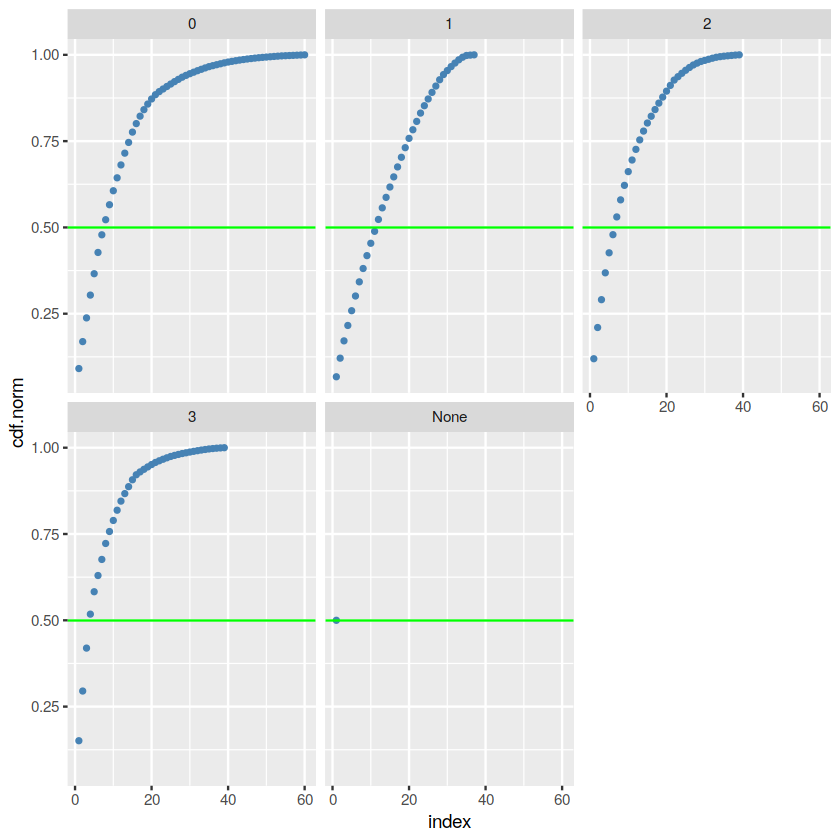

In [10]:
p <- ggplot(data = clone.sizes, aes(index, cdf.norm)) +
  geom_point(color = "steelblue", size = 1) +
  facet_wrap(~ donor) 

p <- p + geom_hline(yintercept=0.5, color='green') 
p

## Get large clones (first 50% of clones)

In [11]:
large.clones <- clone.sizes %>% filter(cdf.norm<0.5)
large.clones
#large.clones$name = factor(paste0(large.clones$donor,"_", large.clones$lineage))


donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,0,0.18226037,415,0_0,0.09113018,415,1
0,52,0.15614398,276,0_52,0.16920217,691,2
0,2,0.13733539,281,0_2,0.23786987,972,3
0,1,0.13211356,304,0_1,0.30392665,1276,4
0,4,0.12390597,247,0_4,0.36587963,1523,5
0,3,0.12315432,256,0_3,0.42745679,1779,6
0,6,0.10231277,195,0_6,0.47861317,1974,7
1,0,0.13459662,254,1_0,0.06729831,254,1
1,1,0.10784947,200,1_1,0.12122304,454,2


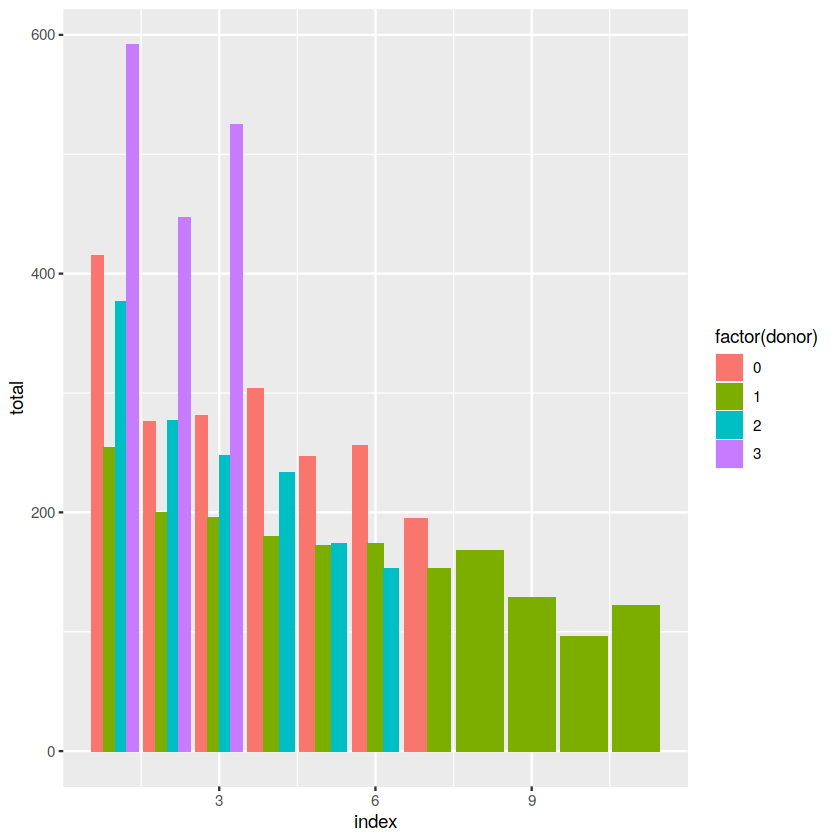

In [12]:
ggplot(data=large.clones, aes(x=index,y=total, fill = factor(donor))) + 
        geom_col(position='dodge')

## Gene DE on top clones

In [18]:
run_de <- function(se.filt, clones.filt.ids, curr.outdir){
    pairs = combn(clones.filt.ids,2)
    for (i in 1:dim(combn(clones.filt.ids,2))[2]){
        print(pairs[,i])
        try({
            print(paste("clones", i))
            a = pairs[1,i]
            b = pairs[2,i]
            da.peaks <- FindMarkers(
                          object = se.filt,
                          ident.1 = a,
                          ident.2 = b, #"CD4 Naive",
                          min.pct = 0.01,
                          logfc.threshold = 0.1,
                          test.use = 'LR', latent.vars = 'peak_region_fragments'
                        )
            print(file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.GeneActivity.csv")))
            print(head(da.peaks))
            write.csv(da.peaks, file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.GeneActivity.csv")),
                     quote=FALSE)
            print(paste('saved clones', a,b))
            plot.DE.RNA.pair(se.filt, da.peaks, a, b, curr.outdir)
            print(paste('plotted clones', a, b))
        })
    }


}

In [16]:
source("/data2/mito_lineage/R_scripts/seurat_utils.R")

In [19]:
for (d in 0:(n_donors-1)){
    print('donor')
    print(d)
    curr.outdir <- file.path(outdir, paste0("donor", d))
    dir.create(curr.outdir)
    ## Filter by donor and large clones
    donor.large.clones <- large.clones %>% filter(donor==d)
    curr.clones <- donor.large.clones$lineage
    #se.filt <- subset(se, subset = (donor.large.clones$donor==d))
    #se.filt <- subset(se.filt, subset= (lineage %in% donor.large.clones$lineage))
    #Idents(se.filt) <- se.filt$lineage
    
    print('clones')
    print(curr.clones)
    print(length(curr.clones))
    se.filt <- subset(se, subset = (donor==d) & (lineage %in% curr.clones))
    Idents(se.filt) <- se.filt$lineage  
    print('se.filt')
    print(dim(se.filt[[]]))  

    DefaultAssay(se.filt) <- "RNA"
    p <- DimPlot(se.filt, split.by = "lineage")
    ggsave(file.path(curr.outdir, paste0("donor.clones.dimplot.png")))
    ## Run DE on pairs of significant clones
    #(compare regressions vs expansions too)
    run_de(se.filt, curr.clones, curr.outdir)
    
}

[1] "donor"
[1] 0


Warning message in dir.create(curr.outdir):
“'/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0' already exists”


[1] "clones"
[1] 0  52 2  1  4  3  6 
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] 7
[1] "se.filt"
[1] 1974   32


Saving 6.67 x 6.67 in image



[1] 0  52
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 1"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_0__52.DE.GeneActivity.csv"
                 p_val avg_log2FC pct.1 pct.2  p_val_adj
PXN       1.576442e-06  0.2292575 0.301 0.112 0.03154461
C20orf194 1.306701e-05  0.2539161 0.371 0.178 0.26147093
VMP1      1.739332e-05  0.2784777 0.518 0.304 0.34804042
INSR      2.965475e-05  0.2364177 0.427 0.221 0.59339148
DEPDC5    3.633306e-05  0.1848710 0.272 0.109 0.72702455
RXRA      4.140224e-05  0.2299457 0.414 0.210 0.82845877
[1] "saved clones 0 52"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 52"
[1] 0 2
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 2"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_0__2.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
ZNF418 6.438424e-05  0.1300561 0.128 0.064         1
INHBE  1.201099e-04  0.1043895 0.157 0.085         1
PDE11A 1.405509e-04 -0.2191536 0.602 0.722         1
IP6K3  2.153954e-04  0.1209377 0.181 0.114         1
CEA    2.320520e-04  0.1770006 0.410 0.338         1
OPA1   3.120921e-04 -0.1289301 0.113 0.224         1
[1] "saved clones 0 2"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 2"
[1] 0 1
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 3"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_0__1.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
INHBE  8.782162e-06  0.1180163 0.157 0.062 0.1757311
PPCS   1.988148e-05  0.1854961 0.294 0.181 0.3978284
SEMA3C 9.873303e-05 -0.1935369 0.301 0.428 1.0000000
MAP2K5 1.372876e-04 -0.1907875 0.523 0.655 1.0000000
IL34   3.418511e-04  0.1229206 0.222 0.128 1.0000000
EZH2   3.654607e-04  0.1707860 0.294 0.194 1.0000000
[1] "saved clones 0 1"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 1"
[1] 0 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 4"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_0__4.DE.GeneActivity.csv"
                  p_val avg_log2FC pct.1 pct.2 p_val_adj
MROH7-TTC4 8.264683e-05 -0.1720682 0.345 0.526         1
ADAMTS19   1.131675e-04 -0.2096825 0.316 0.445         1
INSR       1.234359e-04  0.2041356 0.427 0.348         1
DNAH11     1.716356e-04 -0.2123458 0.463 0.619         1
SGMS1      1.880554e-04 -0.2014407 0.400 0.538         1
ERBB2IP    1.956364e-04 -0.1765267 0.178 0.296         1
[1] "saved clones 0 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 4"
[1] 0 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 5"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_0__3.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
SPACA3   6.308821e-05  0.1932382 0.289 0.215         1
IP6K3    9.132812e-05  0.1287564 0.181 0.090         1
CATSPERB 1.203792e-04 -0.2168992 0.395 0.527         1
DYRK1A   2.724090e-04  0.2146322 0.542 0.445         1
CASC5    3.534176e-04 -0.1797320 0.318 0.434         1
NHSL1    5.329643e-04 -0.2421286 0.499 0.621         1
[1] "saved clones 0 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 3"
[1] 0 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 6"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_0__6.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2  p_val_adj
CHD7     2.905376e-06 -0.3351511 0.571 0.682 0.05813658
CSNK1D   3.720198e-06  0.1201899 0.111 0.021 0.07444116
SNAP91   5.734979e-05 -0.1908332 0.123 0.215 1.00000000
UQCR11   5.971355e-05  0.1449285 0.169 0.046 1.00000000
UQCR11.1 6.863707e-05  0.1029761 0.106 0.015 1.00000000
DDHD2    7.164983e-05  0.1999093 0.335 0.174 1.00000000
[1] "saved clones 0 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 6"
[1] 52 2 
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 7"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_52__2.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
RGS12   1.223987e-05 -0.2580565 0.185 0.441 0.2449197
PXN     2.031740e-05 -0.2221651 0.112 0.317 0.4065511
PITPNM2 3.438014e-05 -0.2674857 0.214 0.466 0.6879467
MYH14   5.613679e-05 -0.2221108 0.214 0.441 1.0000000
FAM65C  6.131658e-05 -0.2393519 0.290 0.544 1.0000000
CLCN6   1.330655e-04 -0.1108654 0.022 0.132 1.0000000
[1] "saved clones 52 2"


Saving 6.67 x 6.67 in image



[1] "plotted clones 52 2"
[1] 52 1 
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 8"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_52__1.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2  p_val_adj
RXRA    7.112260e-07 -0.2845833 0.210 0.454 0.01423163
PXN     9.733600e-07 -0.2411774 0.112 0.326 0.01947693
DEPDC5  1.831579e-06 -0.2123662 0.109 0.319 0.03664990
NADSYN1 9.963224e-06 -0.1134232 0.018 0.112 0.19936412
HMHA1   1.917954e-05 -0.1434201 0.051 0.168 0.38378252
TM7SF2  2.174413e-05 -0.1311261 0.036 0.161 0.43510012
[1] "saved clones 52 1"


Saving 6.67 x 6.67 in image



[1] "plotted clones 52 1"
[1] 52 4 
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 9"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_52__4.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2  p_val_adj
PXN          1.656289e-06 -0.2594281 0.112 0.344 0.03314235
CD47         1.241511e-04 -0.1580213 0.065 0.178 1.00000000
TMLHE        2.173991e-04 -0.1984388 0.264 0.506 1.00000000
PPIE         2.508311e-04 -0.1551469 0.098 0.283 1.00000000
RP11-433C9.2 3.137372e-04 -0.1619630 0.076 0.231 1.00000000
RP11-113D6.6 3.571472e-04  0.1219761 0.149 0.097 1.00000000
[1] "saved clones 52 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 52 4"
[1] 52 3 
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 10"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_52__3.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
PITPNM2  1.382359e-05 -0.2614357 0.214 0.441 0.2766101
RXRA     1.478669e-05 -0.2707610 0.210 0.445 0.2958817
DEPDC5   3.397167e-05 -0.2256367 0.109 0.297 0.6797732
CASC5    4.772996e-05 -0.2445473 0.210 0.434 0.9550765
G3BP2    5.423846e-05  0.1832022 0.167 0.125 1.0000000
CATSPERB 6.462116e-05 -0.2314189 0.283 0.527 1.0000000
[1] "saved clones 52 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 52 3"
[1] 52 6 
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 11"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_52__6.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
RGS12  9.098927e-05 -0.2446680 0.185 0.390         1
UQCR11 1.697359e-04  0.1661325 0.130 0.046         1
PXN    2.301259e-04 -0.2238143 0.112 0.236         1
KDM2B  2.699157e-04 -0.3095789 0.257 0.395         1
PAX8   3.678891e-04 -0.1620864 0.072 0.190         1
LCORL  3.793746e-04  0.2996494 0.453 0.354         1
[1] "saved clones 52 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 52 6"
[1] 2 1
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 12"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_2__1.DE.GeneActivity.csv"
             p_val avg_log2FC pct.1 pct.2 p_val_adj
KCND2 2.126230e-05  0.2532739 0.520 0.359 0.4254587
SESN3 7.629932e-05  0.1606910 0.288 0.145 1.0000000
BOLL  1.727450e-04  0.1157105 0.128 0.049 1.0000000
UBE2Z 1.911491e-04 -0.1013040 0.050 0.102 1.0000000
RALY  2.739232e-04 -0.1952100 0.356 0.461 1.0000000
SGPP2 2.940407e-04  0.1359515 0.274 0.128 1.0000000
[1] "saved clones 2 1"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 1"
[1] 2 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 13"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_2__4.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
BCO2   0.0001672637 -0.1752521 0.189 0.316         1
KAT6B  0.0001859550 -0.1725435 0.224 0.356         1
ZNF418 0.0002572852 -0.1102578 0.064 0.138         1
KRT86  0.0003031826 -0.1273700 0.093 0.190         1
KLRB1  0.0003092315 -0.1530918 0.153 0.296         1
MMP9   0.0003430712 -0.1013659 0.068 0.126         1
[1] "saved clones 2 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 4"
[1] 2 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 14"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_2__3.DE.GeneActivity.csv"
                  p_val avg_log2FC pct.1 pct.2 p_val_adj
SRD5A1     0.0001489390  0.1183627 0.249 0.113         1
AC068533.7 0.0001796032 -0.1025282 0.028 0.082         1
BCAP29     0.0002601020  0.1048854 0.210 0.105         1
FAM185A    0.0002800763  0.1914726 0.452 0.305         1
RORB       0.0003260361  0.2055173 0.480 0.348         1
SLC39A14   0.0003524092  0.1592077 0.274 0.156         1
[1] "saved clones 2 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 3"
[1] 2 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 15"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_2__6.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
GRK4   0.0001380089 -0.1532716 0.171 0.241         1
DLGAP3 0.0001556895  0.1763195 0.288 0.113         1
CELSR1 0.0001643358  0.2379594 0.488 0.267         1
GEMIN6 0.0002117562  0.1311011 0.164 0.051         1
UQCR11 0.0002996774  0.1368189 0.167 0.046         1
CHD7   0.0003102437 -0.2808347 0.619 0.682         1
[1] "saved clones 2 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 6"
[1] 1 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 16"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_1__4.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2  p_val_adj
RBFOX2  4.988315e-06  0.2311657 0.780 0.652 0.09981618
SI      2.092251e-05 -0.1478049 0.056 0.158 0.41865949
NCKIPSD 8.102758e-05  0.1199587 0.158 0.073 1.00000000
ENTPD7  8.809412e-05  0.1653645 0.227 0.130 1.00000000
PNISR   1.361166e-04 -0.1031193 0.039 0.134 1.00000000
PNPLA3  1.391264e-04  0.1048310 0.135 0.053 1.00000000
[1] "saved clones 1 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 4"
[1] 1 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 17"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_1__3.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
C20orf78 8.165308e-05 -0.1058965 0.036 0.113         1
NAV1     8.776698e-05  0.1936542 0.533 0.391         1
SPACA3   9.041156e-05  0.1796165 0.299 0.215         1
SIAH1    1.042987e-04  0.1501084 0.303 0.180         1
CRMP1    1.576699e-04  0.1801803 0.322 0.207         1
PNPLA3   1.947539e-04  0.1032323 0.135 0.055         1
[1] "saved clones 1 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 3"
[1] 1 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 18"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_1__6.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2  p_val_adj
PREX1  1.090729e-06  0.2772157 0.668 0.385 0.02182548
CHD7   2.633258e-06 -0.3695643 0.572 0.682 0.05269150
BTBD11 2.742146e-06  0.2902589 0.625 0.364 0.05487034
ZFPM1  8.484858e-06  0.2090806 0.263 0.092 0.16978201
STRC   9.066913e-06  0.2201014 0.293 0.123 0.18142893
UQCR11 2.208499e-05  0.1433868 0.184 0.046 0.44192060
[1] "saved clones 1 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 6"
[1] 4 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 19"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_4__3.DE.GeneActivity.csv"
                 p_val avg_log2FC pct.1 pct.2 p_val_adj
GHDC      2.302453e-05 -0.1252147 0.024 0.109 0.4607209
KRTCAP3   9.295978e-05  0.1032003 0.126 0.043 1.0000000
HIST1H2BH 1.120420e-04 -0.1818849 0.142 0.246 1.0000000
MREG      5.477528e-04 -0.1776567 0.158 0.258 1.0000000
DGKD      5.885147e-04 -0.1857617 0.231 0.363 1.0000000
ANKRD42   7.306209e-04  0.1455888 0.239 0.172 1.0000000
[1] "saved clones 4 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 4 3"
[1] 4 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 20"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_4__6.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
CHD7    4.324137e-05 -0.3250311 0.587 0.682 0.8652597
CALCRL  6.032791e-05  0.1720395 0.231 0.072 1.0000000
SPATA6L 9.123903e-05  0.2138472 0.377 0.164 1.0000000
SLC7A13 1.036084e-04  0.1580677 0.142 0.046 1.0000000
FHL5    1.495284e-04  0.1415516 0.194 0.056 1.0000000
UQCR11  1.565901e-04  0.1593168 0.170 0.046 1.0000000
[1] "saved clones 4 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 4 6"
[1] 3 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 21"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor0/clones_3__6.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
AANAT  1.662112e-05  0.1533399 0.199 0.046 0.3325887
CSNK1D 2.276087e-05  0.1042174 0.117 0.021 0.4554451
SPACA3 6.163566e-05 -0.2157645 0.215 0.277 1.0000000
CHD7   6.214904e-05 -0.3221747 0.602 0.682 1.0000000
GEMIN6 9.692975e-05  0.1397157 0.160 0.051 1.0000000
LCORL  1.457762e-04  0.2693224 0.566 0.354 1.0000000
[1] "saved clones 3 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 6"
[1] "donor"
[1] 1


Warning message in dir.create(curr.outdir):
“'/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1' already exists”


[1] "clones"
 [1] 0  1  2  3  5  4  8  6  10 19 13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] 11
[1] "se.filt"
[1] 1844   32


Saving 6.67 x 6.67 in image



[1] 0 1
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 1"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__1.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
KIAA2026 5.205706e-05  0.2919930 0.390 0.220         1
HPGD     5.206809e-05  0.1183384 0.098 0.020         1
RXFP1    9.876293e-05  0.2462001 0.634 0.435         1
C1orf173 1.132714e-04  0.1831223 0.209 0.080         1
KCTD14   1.148676e-04  0.1057819 0.122 0.030         1
FMN2     1.637419e-04  0.2650810 0.500 0.310         1
[1] "saved clones 0 1"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 1"
[1] 0 2
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 2"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__2.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
ZNF285  8.824898e-05  0.2144550 0.319 0.184         1
EFCAB14 1.146729e-04 -0.1897699 0.114 0.240         1
CCDC94  2.317580e-04 -0.1856878 0.118 0.219         1
TMEM164 2.500296e-04  0.1459832 0.197 0.071         1
CCDC59  2.703618e-04 -0.1940647 0.213 0.352         1
DERL2   2.797023e-04 -0.1200671 0.016 0.082         1
[1] "saved clones 0 2"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 2"
[1] 0 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 3"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__3.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
TMEM131 6.825791e-05 -0.2929374 0.508 0.661         1
GUF1    9.417175e-05  0.1496908 0.173 0.061         1
CCT5    1.017423e-04  0.1791297 0.232 0.106         1
KCNB2   1.635934e-04  0.2916718 0.756 0.622         1
PNP     1.994488e-04 -0.1409845 0.024 0.089         1
DKKL1   2.293176e-04 -0.2667748 0.240 0.367         1
[1] "saved clones 0 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 3"
[1] 0 5
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 4"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__5.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
NXPE4  0.0004226434 -0.1105286 0.055 0.157         1
MCIDAS 0.0005036432 -0.1104125 0.063 0.169         1
CLVS1  0.0005372727 -0.2338441 0.354 0.552         1
AGTRAP 0.0005586937 -0.1358777 0.122 0.326         1
IBTK   0.0005825805 -0.1430636 0.087 0.244         1
MARCH3 0.0007641569 -0.1816624 0.228 0.442         1
[1] "saved clones 0 5"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 5"
[1] 0 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 5"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__4.DE.GeneActivity.csv"
                  p_val avg_log2FC pct.1 pct.2 p_val_adj
GOLGA5     8.162445e-05  0.1365199 0.146 0.040         1
AC010547.9 1.610854e-04  0.1326844 0.161 0.052         1
TIMP3      1.849915e-04  0.1382151 0.114 0.029         1
FAM91A1    3.093140e-04  0.1586350 0.189 0.057         1
MAPK4      4.860180e-04  0.2031061 0.343 0.161         1
LARP1B     5.528626e-04  0.2421221 0.469 0.259         1
[1] "saved clones 0 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 4"
[1] 0 8
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 6"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__8.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
TLN1    0.0001137002  0.2175708 0.283 0.150         1
FAM118B 0.0001704723  0.1608161 0.165 0.046         1
SLC7A7  0.0002340414  0.1729107 0.213 0.105         1
INTS12  0.0002632291  0.1738944 0.520 0.314         1
MPND    0.0002880529  0.1941946 0.197 0.105         1
CDH8    0.0003705663 -0.2540397 0.240 0.386         1
[1] "saved clones 0 8"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 8"
[1] 0 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 7"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__6.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
ANKS1A 5.261331e-05 -0.2652381 0.413 0.649         1
ICOSLG 1.139380e-04 -0.1407406 0.071 0.226         1
TMEM11 2.051220e-04 -0.1632230 0.043 0.185         1
NGF    3.297898e-04  0.1565191 0.189 0.107         1
METTL9 5.131047e-04 -0.2001496 0.240 0.482         1
DAD1   6.087241e-04 -0.1584831 0.126 0.280         1
[1] "saved clones 0 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 6"
[1] 0  10
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 8"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__10.DE.GeneActivity.csv"
                  p_val avg_log2FC pct.1 pct.2 p_val_adj
ZNF514     3.614723e-05 -0.1143276 0.024 0.132 0.7233061
WASF3      1.708830e-04 -0.2233303 0.366 0.605 1.0000000
FSCN3      2.084140e-04 -0.1028682 0.008 0.062 1.0000000
PPA2       5.215801e-04 -0.2409425 0.291 0.504 1.0000000
SERPINH1   8.924169e-04 -0.1156261 0.039 0.124 1.0000000
AC003002.6 1.036854e-03  0.1295727 0.130 0.062 1.0000000
[1] "saved clones 0 10"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 10"
[1] 0  19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 9"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__19.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
COMP   6.394304e-06 -0.1077011 0.031 0.094   0.12795
PIEZO1 5.631150e-05  0.3939021 0.386 0.083   1.00000
MCTP2  1.175872e-04  0.2938150 0.303 0.062   1.00000
CD9    2.085521e-04  0.2789607 0.354 0.083   1.00000
SPIRE2 3.096351e-04  0.2378640 0.181 0.021   1.00000
RNF38  3.112496e-04 -0.3275931 0.366 0.354   1.00000
[1] "saved clones 0 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 19"
[1] 0  13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 10"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_0__13.DE.GeneActivity.csv"
                     p_val avg_log2FC pct.1 pct.2 p_val_adj
CCNJL         3.502151e-05  0.2150020 0.280 0.107 0.7007805
UBASH3A       4.311882e-05  0.2099982 0.197 0.049 0.8628076
SLC43A2       1.073875e-04  0.2250752 0.256 0.107 1.0000000
RP11-1055B8.7 1.316427e-04  0.1385277 0.130 0.025 1.0000000
MAML1         2.080506e-04  0.1209072 0.094 0.008 1.0000000
RP11-867G23.8 2.859703e-04  0.1271542 0.146 0.033 1.0000000
[1] "saved clones 0 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 13"
[1] 1 2
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 11"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__2.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
IL12RB2  0.0001263443  0.2140743 0.255 0.138         1
RNF43    0.0001609445 -0.1860727 0.055 0.143         1
TPH2     0.0002174502  0.2088234 0.285 0.153         1
KCNH2    0.0002484680  0.1249586 0.110 0.041         1
KIF9     0.0003124157 -0.2084924 0.110 0.235         1
C12orf66 0.0003932856  0.1805253 0.245 0.148         1
[1] "saved clones 1 2"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 2"
[1] 1 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 12"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__3.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
SETBP1   5.528395e-05  0.3002864 0.390 0.278         1
MGAT5B   6.558196e-05  0.2131812 0.260 0.183         1
PNP      7.621395e-05 -0.1489283 0.005 0.089         1
SLC25A51 9.809218e-05  0.1502399 0.165 0.072         1
TGOLN2   1.901572e-04  0.2461835 0.230 0.128         1
C18orf8  2.849019e-04  0.1229470 0.115 0.061         1
[1] "saved clones 1 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 3"
[1] 1 5
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 13"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__5.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
ZMIZ2  0.0001856437 -0.1840204 0.110 0.355         1
ZCCHC6 0.0003777541  0.2124811 0.230 0.221         1
C1R    0.0004675548  0.1150720 0.190 0.198         1
CFTR   0.0007414136 -0.2275075 0.405 0.686         1
CAMK2G 0.0007414869 -0.1918379 0.110 0.326         1
ADCK1  0.0008317750 -0.1987828 0.125 0.360         1
[1] "saved clones 1 5"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 5"
[1] 1 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 14"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__4.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
RNF125 0.0001070393  0.1221288 0.075 0.006         1
LARP4B 0.0001470597  0.2786002 0.380 0.224         1
PRDX4  0.0002151506  0.1030763 0.095 0.017         1
NCEH1  0.0002176691  0.2864782 0.320 0.207         1
GOLGA5 0.0002498543  0.1255797 0.125 0.040         1
PYGO1  0.0003479700 -0.1155748 0.020 0.092         1
[1] "saved clones 1 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 4"
[1] 1 8
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 15"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__8.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
SLC7A7 9.463065e-06  0.2256685 0.225 0.105 0.1893559
FNDC3B 2.630946e-05  0.3781489 0.840 0.725 0.5264523
KIF9   2.936654e-04 -0.2563746 0.110 0.248 1.0000000
EFCAB6 4.049717e-04  0.2400536 0.630 0.458 1.0000000
ANO6   4.433561e-04  0.3140043 0.635 0.497 1.0000000
ATXN2L 6.890453e-04 -0.1637208 0.080 0.203 1.0000000
[1] "saved clones 1 8"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 8"
[1] 1 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 16"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__6.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
SCARB2  4.164452e-05 -0.1993105 0.115 0.393 0.8333068
SLC17A4 1.456765e-04  0.1313980 0.085 0.006 1.0000000
GNMT    1.694050e-04 -0.1522837 0.060 0.232 1.0000000
ANPEP   4.643497e-04  0.1615160 0.205 0.179 1.0000000
PYGO1   4.678257e-04 -0.1064496 0.020 0.119 1.0000000
DPCD    4.720367e-04 -0.1524081 0.070 0.250 1.0000000
[1] "saved clones 1 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 6"
[1] 1  10
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 17"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__10.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
S100A13 7.631174e-05 -0.1441708 0.025 0.155         1
ADAR    1.174903e-04  0.1702348 0.185 0.116         1
CD97    1.550322e-04  0.1516232 0.185 0.109         1
FMN2    2.399643e-04 -0.3272375 0.310 0.574         1
UBE3D   2.909631e-04 -0.2058036 0.155 0.364         1
IL22RA1 3.592012e-04  0.1133401 0.110 0.047         1
[1] "saved clones 1 10"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 10"
[1] 1  19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 18"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__19.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
PRPS2  0.0001266339  0.1743648 0.110 0.000         1
PROM1  0.0002026211 -0.3555605 0.295 0.344         1
ATXN1  0.0002543789  0.4504602 0.765 0.375         1
NHLRC3 0.0002900123 -0.1091675 0.015 0.073         1
GCKR   0.0003435144  0.1633541 0.105 0.000         1
RTKN2  0.0003510324  0.1944952 0.135 0.010         1
[1] "saved clones 1 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 19"
[1] 1  13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 19"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_1__13.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
RNASE1 2.117191e-05 -0.2938230 0.105 0.287 0.4236500
LRP2BP 2.869104e-05 -0.1638590 0.025 0.115 0.5741078
HPGD   5.106953e-05 -0.1492779 0.020 0.107 1.0000000
MCUR1  1.009274e-04  0.1779623 0.165 0.041 1.0000000
KCNH2  1.622824e-04  0.1387641 0.110 0.016 1.0000000
UHRF2  1.732365e-04  0.2824163 0.415 0.238 1.0000000
[1] "saved clones 1 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 13"
[1] 2 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 20"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_2__3.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
KRBOX1  9.724553e-06  0.3056593 0.439 0.256 0.1945883
TPH2    1.167590e-04 -0.2829441 0.153 0.328 1.0000000
CCDC57  1.310785e-04 -0.2341145 0.158 0.322 1.0000000
ABL2    1.437907e-04  0.2737648 0.474 0.333 1.0000000
GAREML  2.210639e-04  0.1264422 0.107 0.033 1.0000000
C18orf8 3.436126e-04  0.1031534 0.133 0.061 1.0000000
[1] "saved clones 2 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 3"
[1] 2 5
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 21"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_2__5.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
ZMIZ2  5.721785e-05 -0.1954455 0.112 0.355         1
PDE11A 1.642698e-04 -0.2844291 0.592 0.837         1
NR5A1  1.701815e-04 -0.1187286 0.026 0.186         1
PRR4   2.203936e-04 -0.2247639 0.347 0.669         1
ZNF653 2.649616e-04 -0.1419063 0.061 0.233         1
NALCN  4.252021e-04 -0.2156022 0.311 0.628         1
[1] "saved clones 2 5"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 5"
[1] 2 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 22"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_2__4.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
RNF125   9.582927e-06  0.1637065 0.097 0.006 0.1917544
HIST1H1B 2.062339e-05  0.1356708 0.138 0.023 0.4126740
DST      2.643344e-05  0.3779067 0.724 0.552 0.5289331
GOLGA5   3.772977e-05  0.1778940 0.158 0.040 0.7549727
ESPL1    1.091624e-04  0.1972553 0.189 0.057 1.0000000
PNKD     1.176342e-04 -0.3005218 0.250 0.391 1.0000000
[1] "saved clones 2 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 4"
[1] 2 8
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 23"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_2__8.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
SLC7A7   0.0001101494  0.2100612 0.219 0.105         1
CD200R1L 0.0001128971 -0.2487673 0.138 0.281         1
KPNA4    0.0001985367 -0.2088869 0.153 0.307         1
SERTAD4  0.0002162748 -0.1319719 0.020 0.098         1
FAM184A  0.0002224049  0.3348649 0.577 0.431         1
MAPRE3   0.0002420106 -0.2476090 0.158 0.294         1
[1] "saved clones 2 8"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 8"
[1] 2 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 24"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_2__6.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2 p_val_adj
SMG8         3.326095e-05 -0.1204731 0.036 0.149 0.6655517
PRPF40B      7.221095e-05 -0.2298814 0.209 0.452 1.0000000
TECPR1       1.041135e-04 -0.1576835 0.077 0.238 1.0000000
CCDC57       3.080746e-04 -0.2054746 0.158 0.393 1.0000000
PLD5         3.999012e-04 -0.2325995 0.306 0.560 1.0000000
CTD-2510F5.6 5.976773e-04 -0.1196443 0.061 0.185 1.0000000
[1] "saved clones 2 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 6"
[1] 2  10
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 25"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_2__10.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
TMEM247 1.281013e-05 -0.2491443 0.107 0.326 0.2563308
C2orf88 1.753824e-05 -0.3453861 0.653 0.884 0.3509401
TBX5    8.503252e-05  0.1085564 0.133 0.039 1.0000000
CUEDC1  1.316136e-04  0.2039881 0.224 0.124 1.0000000
C6      1.351728e-04 -0.2135628 0.077 0.271 1.0000000
GNG4    1.498871e-04 -0.2185619 0.168 0.403 1.0000000
[1] "saved clones 2 10"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 10"
[1] 2  19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 26"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_2__19.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
LLPH    1.820489e-15 -0.1307503 0.005 0.031 3.642798e-11
COMP    1.761073e-05 -0.1151635 0.026 0.094 3.523907e-01
MMS19   1.303259e-04  0.2435317 0.158 0.010 1.000000e+00
CEP104  1.486764e-04 -0.1880620 0.071 0.115 1.000000e+00
IL12RB2 1.615750e-04 -0.1361983 0.138 0.177 1.000000e+00
BTK     1.820360e-04  0.1832038 0.102 0.000 1.000000e+00
[1] "saved clones 2 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 19"
[1] 2  13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 27"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_2__13.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
MAML1  1.815542e-05  0.1425119 0.122 0.008 0.3632899
SPRYD7 3.456341e-05 -0.2009919 0.015 0.115 0.6916138
NPC1   7.103963e-05 -0.2574201 0.214 0.410 1.0000000
SLAMF7 2.897751e-04  0.1941787 0.199 0.057 1.0000000
ACP2   3.937811e-04 -0.1827024 0.102 0.246 1.0000000
LHFPL5 3.997584e-04 -0.1120480 0.026 0.115 1.0000000
[1] "saved clones 2 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 13"
[1] 3 5
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 28"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_3__5.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
PRRC2C  5.005935e-05 -0.2815189 0.256 0.512         1
MYL5    1.689237e-04 -0.1007641 0.028 0.157         1
ACTR5   2.120657e-04 -0.1188153 0.039 0.209         1
C18orf8 3.607343e-04 -0.1376804 0.061 0.198         1
RECQL   4.476080e-04 -0.1191943 0.056 0.250         1
ORC5    5.394727e-04  0.1521215 0.172 0.099         1
[1] "saved clones 3 5"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 5"
[1] 3 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 29"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_3__4.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
PNP      7.084995e-06  0.1566717 0.089 0.000 0.1417708
TMEM26   1.054217e-04  0.2407132 0.222 0.069 1.0000000
COL4A3BP 1.351424e-04 -0.3277877 0.239 0.322 1.0000000
CES4A    1.414424e-04 -0.1722565 0.067 0.155 1.0000000
CCDC125  1.619453e-04  0.1066735 0.094 0.017 1.0000000
SMAP1    3.459721e-04  0.2506227 0.389 0.207 1.0000000
[1] "saved clones 3 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 4"
[1] 3 8
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 30"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_3__8.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
SLC7A7  1.918609e-05  0.2190357 0.261 0.105 0.3839137
AKR1B15 2.440477e-05  0.1120480 0.106 0.007 0.4883394
CNIH4   1.589407e-04 -0.1689741 0.122 0.268 1.0000000
ACVR1   1.618820e-04 -0.2724591 0.233 0.366 1.0000000
QTRTD1  2.779407e-04 -0.2481163 0.278 0.444 1.0000000
IL26    3.138111e-04  0.2050141 0.200 0.098 1.0000000
[1] "saved clones 3 8"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 8"
[1] 3 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 31"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_3__6.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2 p_val_adj
EED          1.269092e-05 -0.1873207 0.089 0.274 0.2539453
AR           1.414198e-04  0.1965771 0.183 0.077 1.0000000
RP11-723G8.2 1.825266e-04  0.1181261 0.122 0.024 1.0000000
ZNF783       1.880231e-04 -0.2362153 0.167 0.363 1.0000000
ALS2         2.116901e-04 -0.2181646 0.206 0.417 1.0000000
KRBOX1       2.287090e-04 -0.2531130 0.256 0.494 1.0000000
[1] "saved clones 3 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 6"
[1] 3  10
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 32"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_3__10.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
C18orf8  1.179899e-05 -0.1558594 0.061 0.202 0.2360978
COL24A1  6.438523e-05 -0.3271474 0.539 0.775 1.0000000
COL4A3BP 1.290602e-04 -0.2567931 0.239 0.481 1.0000000
ACTN2    1.450531e-04 -0.2606289 0.144 0.372 1.0000000
PALLD    2.349500e-04 -0.3132185 0.578 0.783 1.0000000
METTL7A  2.581413e-04 -0.1098870 0.033 0.155 1.0000000
[1] "saved clones 3 10"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 10"
[1] 3  19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 33"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_3__19.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2  p_val_adj
COMP         2.380238e-06 -0.1223344 0.011 0.094 0.04762856
C18orf8      1.028791e-05 -0.2533269 0.061 0.115 0.20586115
SETBP1       2.482804e-05 -0.5417602 0.278 0.333 0.49680902
MGAT5B       1.039065e-04 -0.2193407 0.183 0.188 1.00000000
RP11-176H8.1 2.918341e-04  0.2929883 0.217 0.031 1.00000000
EEA1         3.480109e-04 -0.3362622 0.311 0.302 1.00000000
[1] "saved clones 3 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 19"
[1] 3  13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 34"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_3__13.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2   p_val_adj
C18orf8 3.549447e-07 -0.2109852 0.061 0.197 0.007102443
PLEC    9.416473e-05  0.2709164 0.244 0.090 1.000000000
MGAT5B  1.103923e-04 -0.2657786 0.183 0.270 1.000000000
ZRANB2  1.340686e-04 -0.1213827 0.017 0.107 1.000000000
CHP1    1.712919e-04  0.2088817 0.211 0.066 1.000000000
DIEXF   1.820029e-04 -0.1526965 0.011 0.082 1.000000000
[1] "saved clones 3 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 13"
[1] 5 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 35"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_5__4.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
GOLGA5  0.0001096748  0.1548103 0.256 0.040         1
CHRNB4  0.0001302399 -0.2233720 0.308 0.310         1
ZNF644  0.0003848261  0.1919494 0.407 0.138         1
FAM179A 0.0004445636  0.2150109 0.355 0.115         1
AGTRAP  0.0005309461  0.1556679 0.326 0.075         1
DHX34   0.0005677830  0.1111736 0.145 0.017         1
[1] "saved clones 5 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 5 4"
[1] 5 8
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 36"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_5__8.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
AGTRAP  4.817609e-05  0.1798984 0.326 0.098 0.9640035
VWA1    1.530269e-04 -0.1498414 0.128 0.222 1.0000000
DIRC1   3.088582e-04  0.1883805 0.343 0.111 1.0000000
PAFAH2  3.398641e-04 -0.2395816 0.297 0.320 1.0000000
TEN1    3.789815e-04  0.1098625 0.110 0.013 1.0000000
HEATR5A 4.558540e-04 -0.1530731 0.244 0.307 1.0000000
[1] "saved clones 5 8"


Saving 6.67 x 6.67 in image



[1] "plotted clones 5 8"
[1] 5 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 37"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_5__6.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
PRRC2C  2.776445e-05  0.2716805 0.512 0.315 0.5555667
EHBP1   7.013048e-05  0.3299694 0.669 0.452 1.0000000
FAM227B 1.028114e-04 -0.2498722 0.622 0.744 1.0000000
NALCN   2.313268e-04  0.2483570 0.628 0.411 1.0000000
TRIM27  2.665706e-04  0.1056686 0.163 0.030 1.0000000
INTS10  3.557247e-04 -0.1508920 0.192 0.304 1.0000000
[1] "saved clones 5 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 5 6"
[1] 5  10
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 38"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_5__10.DE.GeneActivity.csv"
                     p_val avg_log2FC pct.1 pct.2 p_val_adj
WASF3         0.0001634972 -0.2259208 0.488 0.605         1
CEACAM3       0.0001818419  0.1039069 0.180 0.031         1
NRBP1         0.0001855691 -0.1345143 0.099 0.186         1
FAM174B       0.0007312867  0.2022612 0.517 0.264         1
SCN7A         0.0007952242 -0.1683091 0.215 0.326         1
RP11-212D19.4 0.0008484981 -0.1381678 0.140 0.209         1
[1] "saved clones 5 10"


Saving 6.67 x 6.67 in image



[1] "plotted clones 5 10"
[1] 5  19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 39"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_5__19.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2 p_val_adj
ZNF852       0.000000e+00 -0.1934607 0.017 0.083  0.000000
SEPT6        3.948221e-05 -0.1902141 0.169 0.125  0.790039
GEM          1.380772e-04  0.1976015 0.238 0.000  1.000000
GTPBP2       1.938799e-04  0.1408371 0.134 0.000  1.000000
RP11-302M6.4 3.715966e-04 -0.5217609 0.541 0.406  1.000000
DDX6         5.105647e-04  0.1710218 0.209 0.000  1.000000
[1] "saved clones 5 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 5 19"
[1] 5  13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 40"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_5__13.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2  p_val_adj
SCN10A 6.820230e-07  0.2493316 0.337 0.049 0.01364728
TK2    1.254604e-04  0.2173022 0.384 0.090 1.00000000
CCNJL  1.386706e-04  0.2211916 0.384 0.107 1.00000000
HIC2   3.825034e-04  0.1129221 0.169 0.025 1.00000000
ZNF644 4.630040e-04  0.2051109 0.407 0.164 1.00000000
SEPT6  5.756397e-04 -0.1115633 0.169 0.189 1.00000000
[1] "saved clones 5 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 5 13"
[1] 4 8
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 41"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_4__8.DE.GeneActivity.csv"
                  p_val avg_log2FC pct.1 pct.2 p_val_adj
GOLGA5     1.345673e-05 -0.1679073 0.040 0.176 0.2692691
LANCL1     5.744508e-05 -0.1359165 0.011 0.092 1.0000000
FAM91A1    6.960896e-05 -0.2209361 0.057 0.216 1.0000000
PRPF8      7.264572e-05  0.1180196 0.167 0.085 1.0000000
CADM4      7.520412e-05 -0.1073314 0.000 0.072 1.0000000
AC010547.9 4.994982e-04 -0.1550323 0.052 0.176 1.0000000
[1] "saved clones 4 8"


Saving 6.67 x 6.67 in image



[1] "plotted clones 4 8"
[1] 4 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 42"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_4__6.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
COLEC11 0.0003644742 -0.1549309 0.057 0.196         1
GOLGA5  0.0003809461 -0.1480667 0.040 0.179         1
ACSL3   0.0004081570 -0.1649850 0.126 0.405         1
DNAH6   0.0005472252 -0.3059740 0.483 0.810         1
DNAAF3  0.0009657573 -0.1741474 0.029 0.143         1
GNAI2   0.0011200554  0.1888116 0.218 0.161         1
[1] "saved clones 4 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 4 6"
[1] 4  10
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 43"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_4__10.DE.GeneActivity.csv"
                  p_val avg_log2FC pct.1 pct.2 p_val_adj
GOLGA5     2.578313e-05 -0.1734002 0.040 0.202 0.5159204
AC003002.6 2.672164e-05  0.1401689 0.126 0.062 0.5347001
NCMAP      5.342019e-05  0.1507758 0.190 0.132 1.0000000
NEK10      6.198009e-05 -0.2993097 0.328 0.628 1.0000000
ZDHHC2     8.549731e-05 -0.2612484 0.109 0.287 1.0000000
ZNF521     1.128920e-04 -0.2695641 0.316 0.636 1.0000000
[1] "saved clones 4 10"


Saving 6.67 x 6.67 in image



[1] "plotted clones 4 10"
[1] 4  19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 44"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_4__19.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
GOLGA5 1.667511e-05 -0.2879710 0.040 0.135  0.333669
VANGL2 6.206137e-05 -0.1019423 0.052 0.094  1.000000
DNPEP  1.117992e-04 -0.1480169 0.006 0.062  1.000000
ATXN1  1.924556e-04  0.4656389 0.753 0.375  1.000000
GAB1   2.542851e-04 -0.3648067 0.167 0.281  1.000000
COMP   3.418398e-04 -0.1126038 0.011 0.094  1.000000
[1] "saved clones 4 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 4 19"
[1] 4  13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 45"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_4__13.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
ATP11C   2.289392e-05 -0.3058567 0.126 0.320 0.4581074
C11orf72 3.437083e-05 -0.1522403 0.017 0.115 0.6877602
TLL1     8.398245e-05 -0.3514132 0.184 0.393 1.0000000
COLEC11  1.132121e-04 -0.2179050 0.057 0.189 1.0000000
HIST1H1B 1.284096e-04 -0.1628068 0.023 0.115 1.0000000
NEK10    1.289982e-04 -0.3308143 0.328 0.541 1.0000000
[1] "saved clones 4 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 4 13"
[1] 8 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 46"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_8__6.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
SLC7A7  3.874443e-05 -0.2267402 0.105 0.321 0.7752760
FAM184A 4.973824e-05 -0.3433086 0.431 0.720 0.9952621
EFCAB6  3.659699e-04 -0.2996579 0.458 0.720 1.0000000
COL4A6  6.552949e-04 -0.2355826 0.333 0.595 1.0000000
SULT2B1 7.088949e-04 -0.1805405 0.098 0.232 1.0000000
RPL37A  7.279432e-04 -0.1853141 0.163 0.375 1.0000000
[1] "saved clones 8 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 8 6"
[1] 8  10
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 47"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_8__10.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
POLR3C  2.769176e-05 -0.1423332 0.013 0.132 0.5541122
SLC38A6 4.405853e-05 -0.3083845 0.307 0.543 0.8816111
FNDC3B  6.638554e-05 -0.4019611 0.725 0.915 1.0000000
ADAR    7.092255e-05  0.1844872 0.222 0.116 1.0000000
SNX14   1.098036e-04 -0.1556111 0.046 0.194 1.0000000
FAM184A 1.199724e-04 -0.3455472 0.431 0.690 1.0000000
[1] "saved clones 8 10"


Saving 6.67 x 6.67 in image



[1] "plotted clones 8 10"
[1] 8  19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 48"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_8__19.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
SEC61A2 2.050914e-05  0.3638831 0.242 0.042 0.4103879
SULT2B1 4.904341e-05 -0.1585510 0.098 0.125 0.9813587
RNF135  2.733523e-04  0.1800792 0.137 0.000 1.0000000
TRPV3   3.391599e-04  0.1988253 0.144 0.000 1.0000000
ATXN1   4.010536e-04  0.4688233 0.771 0.375 1.0000000
NTRK2   4.114800e-04  0.4350751 0.719 0.312 1.0000000
[1] "saved clones 8 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 8 19"
[1] 8  13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 49"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_8__13.DE.GeneActivity.csv"
                   p_val avg_log2FC pct.1 pct.2 p_val_adj
SCN1A       8.722370e-05 -0.2244972 0.111 0.246         1
MAML1       9.232926e-05  0.1370103 0.118 0.008         1
GDI2        1.096889e-04  0.2874298 0.366 0.148         1
SOAT2       2.236840e-04 -0.2784441 0.150 0.320         1
CTB-133G6.1 2.264804e-04 -0.1588221 0.020 0.098         1
MDFIC       2.379780e-04 -0.2582405 0.092 0.213         1
[1] "saved clones 8 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 8 13"
[1] 6  10
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 50"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_6__10.DE.GeneActivity.csv"
                     p_val avg_log2FC pct.1 pct.2 p_val_adj
CTD-2006C1.10 9.059637e-05  0.1726365 0.226 0.093         1
AC003002.6    1.134297e-04  0.1654037 0.161 0.062         1
C6            1.332186e-04 -0.2151406 0.119 0.271         1
KAT7          2.115432e-04  0.2139941 0.369 0.171         1
TMPRSS2       2.228530e-04  0.2121057 0.393 0.194         1
SLC12A9       2.607744e-04  0.2190799 0.458 0.279         1
[1] "saved clones 6 10"


Saving 6.67 x 6.67 in image



[1] "plotted clones 6 10"
[1] 6  19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 51"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_6__19.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
GATS   4.926338e-05 -0.1122991 0.131 0.146 0.9857602
CRISP1 1.004633e-04 -0.1531812 0.042 0.083 1.0000000
TGDS   1.100472e-04 -0.1268362 0.202 0.167 1.0000000
ZNF562 2.233663e-04  0.2338076 0.226 0.021 1.0000000
LIMD2  3.019916e-04 -0.1078854 0.006 0.031 1.0000000
MESDC1 3.148170e-04 -0.1518563 0.060 0.052 1.0000000
[1] "saved clones 6 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 6 19"
[1] 6  13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 52"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_6__13.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
MPHOSPH9 5.664454e-05  0.2939765 0.435 0.164         1
SCN10A   7.506048e-05  0.2009006 0.244 0.049         1
PUS10    8.027258e-05  0.2738375 0.393 0.172         1
SIRPG    1.309716e-04  0.2148850 0.208 0.049         1
NGF      2.612978e-04 -0.1363483 0.107 0.197         1
EHBP1    3.425635e-04 -0.2635380 0.452 0.516         1
[1] "saved clones 6 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 6 13"
[1] 10 19
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 53"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_10__19.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
RTKN2   2.878898e-05  0.2244577 0.209 0.010 0.5760675
RNF126  1.101669e-04  0.1669042 0.124 0.000 1.0000000
DDX6    1.272642e-04  0.1763366 0.155 0.000 1.0000000
GPR78   1.570162e-04 -0.1485650 0.039 0.094 1.0000000
PUF60   2.090442e-04  0.2070325 0.194 0.000 1.0000000
TMEM175 3.835620e-04  0.1581778 0.147 0.000 1.0000000
[1] "saved clones 10 19"


Saving 6.67 x 6.67 in image



[1] "plotted clones 10 19"
[1] 10 13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 54"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_10__13.DE.GeneActivity.csv"
                     p_val avg_log2FC pct.1 pct.2 p_val_adj
TGIF1         6.098486e-05  0.2811507 0.388 0.156         1
PRPF39        1.177890e-04 -0.1450800 0.016 0.107         1
RP11-1021N1.1 2.069434e-04  0.2594221 0.488 0.230         1
SLAMF7        2.142212e-04  0.1842545 0.233 0.057         1
STXBP1        3.041157e-04  0.2036057 0.240 0.049         1
MCUR1         3.180695e-04  0.1612900 0.225 0.041         1
[1] "saved clones 10 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 10 13"
[1] 19 13
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 55"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor1/clones_19__13.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
GATS   0.0001700482  0.1523565 0.146 0.057         1
FRRS1L 0.0002511295  0.2034979 0.135 0.107         1
SCN10A 0.0002630306  0.3333408 0.177 0.049         1
EPS8L1 0.0002664374  0.1361266 0.115 0.066         1
ACSF3  0.0002737892 -0.3738651 0.052 0.262         1
PUF60  0.0003273553 -0.2031617 0.000 0.123         1
[1] "saved clones 19 13"


Saving 6.67 x 6.67 in image



[1] "plotted clones 19 13"
[1] "donor"
[1] 2


Warning message in dir.create(curr.outdir):
“'/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2' already exists”


[1] "clones"
[1] 0 1 2 3 4 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] 6
[1] "se.filt"
[1] 1462   32


Saving 6.67 x 6.67 in image



[1] 0 1
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 1"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_0__1.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
USP38   5.558926e-05 -0.1566540 0.088 0.177         1
RAB20   1.817093e-04 -0.1809066 0.164 0.267         1
USP14   3.385924e-04 -0.1627418 0.149 0.224         1
FAM135A 4.183559e-04 -0.1779666 0.281 0.383         1
VRK2    4.819032e-04 -0.2032889 0.332 0.419         1
C8orf37 6.266473e-04 -0.1499099 0.154 0.249         1
[1] "saved clones 0 1"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 1"
[1] 0 2
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 2"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_0__2.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
RPIA     0.0001091140 -0.1571998 0.093 0.165         1
RPP40    0.0001134768 -0.1211453 0.080 0.129         1
APTX     0.0001875832  0.2284593 0.313 0.185         1
DFNA5    0.0002985707  0.1523590 0.191 0.101         1
CACNA2D2 0.0003281357  0.1690622 0.289 0.153         1
NLRP10   0.0004237899  0.1268749 0.149 0.073         1
[1] "saved clones 0 2"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 2"
[1] 0 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 3"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_0__3.DE.GeneActivity.csv"
                   p_val avg_log2FC pct.1 pct.2 p_val_adj
TMEM8B      4.056178e-05  0.2424954 0.350 0.163 0.8116412
APTX        6.575464e-05  0.2626161 0.313 0.137 1.0000000
C2orf61     1.032868e-04  0.2320774 0.398 0.202 1.0000000
AP000304.12 1.246397e-04  0.2515145 0.716 0.498 1.0000000
SEPT14      1.388764e-04  0.1634289 0.164 0.047 1.0000000
GCN1L1      1.427497e-04  0.2008331 0.284 0.120 1.0000000
[1] "saved clones 0 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 3"
[1] 0 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 4"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_0__4.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
PSMF1    6.056267e-05  0.1816116 0.212 0.075         1
TSG101   1.009025e-04  0.1926353 0.225 0.109         1
NRTN     1.576139e-04 -0.1241041 0.032 0.098         1
RPGRIP1L 2.337017e-04  0.1872858 0.310 0.144         1
TMEM260  3.719116e-04  0.1935727 0.191 0.098         1
IQSEC2   4.400740e-04  0.1704656 0.228 0.109         1
[1] "saved clones 0 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 4"
[1] 0 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 5"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_0__6.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2 p_val_adj
EPS15L1      7.548933e-06  0.2846280 0.377 0.183 0.1510541
FHDC1        8.390782e-06 -0.1551904 0.034 0.137 0.1678995
C1R          3.046146e-05  0.1717462 0.183 0.052 0.6095339
YPEL2        3.284155e-05  0.3094006 0.483 0.288 0.6571595
RP4-734P14.4 6.478786e-05  0.2274052 0.231 0.078 1.0000000
RDM1         6.552732e-05  0.1275715 0.119 0.020 1.0000000
[1] "saved clones 0 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 6"
[1] 1 2
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 6"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_1__2.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2  p_val_adj
DFNA5  5.564528e-07  0.2184047 0.235 0.101 0.01113462
TTC29  2.408787e-05  0.2700973 0.643 0.472 0.48199827
ZNF254 3.873284e-05 -0.1443940 0.036 0.113 0.77504406
IQCB1  1.265950e-04  0.1972174 0.267 0.137 1.00000000
XKR6   2.290660e-04  0.2372626 0.455 0.302 1.00000000
SIRT3  5.278860e-04 -0.1182835 0.047 0.101 1.00000000
[1] "saved clones 1 2"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 2"
[1] 1 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 7"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_1__3.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
STRIP1 6.401000e-05  0.1155580 0.123 0.017         1
GTPBP8 7.701056e-05 -0.1070895 0.011 0.069         1
CDH9   9.567543e-05 -0.2647788 0.227 0.330         1
CMKLR1 1.576345e-04  0.2610896 0.433 0.245         1
SEPT14 2.006170e-04  0.1480149 0.170 0.047         1
ZNF786 2.558647e-04  0.1022295 0.105 0.017         1
[1] "saved clones 1 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 3"
[1] 1 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 8"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_1__4.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
ARHGEF3 1.681059e-05  0.3489509 0.711 0.494 0.3363800
ZBTB37  2.649860e-05  0.2685177 0.339 0.172 0.5302369
NSUN4   3.005622e-05 -0.1800844 0.025 0.092 0.6014250
BCAT1   8.356076e-05  0.2650416 0.422 0.230 1.0000000
DAAM1   1.139717e-04  0.2517521 0.365 0.190 1.0000000
RAB20   2.328170e-04  0.2245790 0.267 0.138 1.0000000
[1] "saved clones 1 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 4"
[1] 1 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 9"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_1__6.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2 p_val_adj
EIF3B        9.367325e-05  0.2977779 0.303 0.190         1
GLB1L3       1.207820e-04  0.1768003 0.148 0.052         1
FBXL7        2.453093e-04 -0.2955175 0.278 0.412         1
POR          3.347841e-04  0.2073359 0.300 0.137         1
RP11-410N8.4 3.484077e-04  0.1186626 0.079 0.007         1
ANXA3        4.285195e-04  0.1356059 0.130 0.020         1
[1] "saved clones 1 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 1 6"
[1] 2 3
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 10"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_2__3.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
ZNF460   2.898611e-05  0.1072424 0.060 0.004 0.5800121
PACSIN3  5.048394e-05  0.1048425 0.069 0.009 1.0000000
ASTE1    2.878665e-04 -0.1417963 0.048 0.124 1.0000000
TTC17    2.986773e-04 -0.2401868 0.226 0.326 1.0000000
SLC22A14 3.727984e-04  0.1414421 0.125 0.043 1.0000000
SLC16A9  3.854488e-04  0.2056189 0.214 0.082 1.0000000
[1] "saved clones 2 3"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 3"
[1] 2 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 11"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_2__4.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
TTC26  1.282038e-05  0.2533182 0.250 0.103 0.2565358
CD82   9.177968e-05 -0.2162578 0.129 0.241 1.0000000
SUZ12  1.379476e-04  0.1859216 0.173 0.069 1.0000000
DFNA5  1.485028e-04 -0.1754146 0.101 0.190 1.0000000
TSG101 2.208041e-04  0.1600329 0.218 0.109 1.0000000
ZBTB37 2.525660e-04  0.2133388 0.327 0.172 1.0000000
[1] "saved clones 2 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 4"
[1] 2 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 12"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_2__6.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2  p_val_adj
TDRD5  4.433039e-06 -0.2807706 0.125 0.275 0.08870511
BMP5   8.306252e-05 -0.1846469 0.060 0.163 1.00000000
EPB42  1.166091e-04  0.2997136 0.335 0.190 1.00000000
HS1BP3 1.266541e-04 -0.2934626 0.161 0.314 1.00000000
GNG7   1.689671e-04  0.2578681 0.335 0.163 1.00000000
STX7   2.325957e-04 -0.3632991 0.323 0.484 1.00000000
[1] "saved clones 2 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 2 6"
[1] 3 4
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 13"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_3__4.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
GTPBP8 8.286186e-06  0.1170918 0.069 0.000 0.1658066
CADM3  7.422637e-05  0.1346587 0.112 0.029 1.0000000
MMP16  2.241698e-04 -0.3307806 0.253 0.414 1.0000000
AFG3L2 2.439284e-04 -0.2890366 0.133 0.270 1.0000000
CHST7  2.480543e-04  0.1103569 0.064 0.006 1.0000000
ZMYM5  2.507802e-04 -0.1969757 0.052 0.172 1.0000000
[1] "saved clones 3 4"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 4"
[1] 3 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 14"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_3__6.DE.GeneActivity.csv"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
TASP1  8.392919e-06 -0.3919912 0.356 0.569 0.1679423
PHLPP1 1.262704e-05 -0.3310317 0.206 0.425 0.2526670
TDRD5  5.341582e-05 -0.2413803 0.099 0.275 1.0000000
ANO5   1.195170e-04 -0.2431207 0.064 0.170 1.0000000
TXLNB  1.281952e-04 -0.2993754 0.137 0.275 1.0000000
RDM1   1.553951e-04  0.1554841 0.094 0.020 1.0000000
[1] "saved clones 3 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 3 6"
[1] 4 6
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 15"


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor2/clones_4__6.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
HIST1H4B 5.638450e-06 -0.1875605 0.011 0.124 0.1128254
CCNA1    3.465334e-05 -0.1385110 0.000 0.072 0.6934133
GNG7     1.006521e-04  0.2598586 0.328 0.163 1.0000000
KRT8     1.301186e-04  0.2407378 0.270 0.144 1.0000000
TSG101   1.333227e-04 -0.1919229 0.109 0.235 1.0000000
FAM20C   1.684406e-04  0.2119267 0.161 0.059 1.0000000
[1] "saved clones 4 6"


Saving 6.67 x 6.67 in image



[1] "plotted clones 4 6"
[1] "donor"
[1] 3
[1] "clones"
[1] 0  36 1 
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] 3
[1] "se.filt"
[1] 1564   32


Saving 6.67 x 6.67 in image



[1] 0  36
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 1"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor3/clones_0__36.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
ROPN1L  7.433907e-05  0.1583727 0.191 0.092         1
CWH43   1.401622e-04 -0.1158432 0.054 0.101         1
PLEKHM3 1.788025e-04 -0.1836028 0.152 0.183         1
SCRG1   5.315491e-04 -0.1040779 0.037 0.069         1
ANK1    5.635061e-04  0.2169554 0.480 0.333         1
ROR2    5.955284e-04  0.1812300 0.495 0.329         1
[1] "saved clones 0 36"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 36"
[1] 0 1
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 2"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor3/clones_0__1.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
MED1    1.034568e-05 -0.1160458 0.073 0.128 0.2070171
FASTKD3 1.833603e-05 -0.1171944 0.047 0.090 0.3669039
TRAM2   1.195739e-04  0.1640235 0.306 0.187 1.0000000
RIN3    2.085291e-04 -0.1926002 0.443 0.484 1.0000000
PDE2A   2.529285e-04 -0.1223759 0.157 0.223 1.0000000
HPRT1   2.552215e-04 -0.1285776 0.066 0.114 1.0000000
[1] "saved clones 0 1"


Saving 6.67 x 6.67 in image



[1] "plotted clones 0 1"
[1] 36 1 
61 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... None
[1] "clones 3"
[1] "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist/DE_large/donor3/clones_36__1.DE.GeneActivity.csv"
               p_val avg_log2FC pct.1 pct.2 p_val_adj
CHID1   5.225129e-05 -0.1135333 0.036 0.103         1
SLC24A1 1.059795e-04 -0.1428318 0.074 0.162         1
PRR16   1.529832e-04  0.2032124 0.244 0.160         1
ROR2    2.095816e-04 -0.1947256 0.329 0.461         1
SRCAP   2.346748e-04 -0.1590406 0.119 0.204         1
ARSB    2.729463e-04  0.1877894 0.322 0.250         1
[1] "saved clones 36 1"


Saving 6.67 x 6.67 in image



[1] "plotted clones 36 1"
